---
title: "Python Training (3 of 4): Introductory Visualisation"
--- 

In this third workshop we will cover

-   Using Jupyter notebooks
-   Simple visualisations with seaborn
-   Making modifications with matplotlib

## Setting up

### Jupyter Notebooks

For these next two sessions, we'll depart from Spyder and move to a different tool: [Jupyter Notebooks](https://jupyter.org/). These interactive files allow you to type formatted code (markdown) and Python cells interchangebly.

#### Opening Jupyter

**If you installed Spyder via Anaconda**

Then you've already got it! Open the application "Jupyter" on your computer. Alternatively, open a command prompt / shell and type `jupyter notebook`.

**If you installed Spyder manually**

Then you'll probably need to get it. The simplest way is via a pip install.

1. Open a command prompt / shell
2. Type `pip install jupyterlab`
3. Once it's finished, type `jupyter notebook` in your shell

**If you can't install it**

If you're having issues with the installation, can't get it to work or don't want to, you can use [Google Colab](https://colab.google/) instead. Just sign in with your Google account and you gain access to a cloud-hosted notebook. Note that everything will save to your Google Drive.

#### Creating a notebook

Once you've opened Jupyter/Colab, 

1. Navigate to a folder on your computer where you'd like to save today's files. We suggest the project folder you've been using for the past two sessions. 
2. Press `New` -> `Notebook` to create your notebook. Select Python3 when prompted.

#### Using notebooks

The fundamental building block of jupyter notebooks is the **cell**. This is the block you can currently write in:

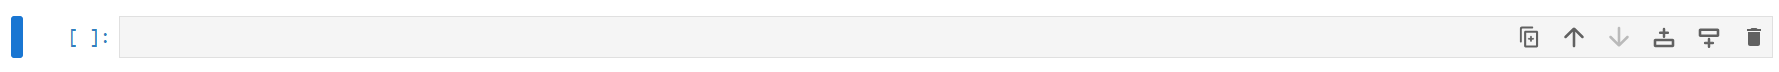

I can type Python code into this cell and run it:

In [69]:
print("This is a cell!")

This is a cell!


It's currently a code cell

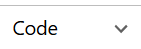

If I change it to [markdown](https://www.markdownguide.org/)

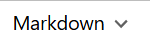

I can type formatted text. This isn't a markdown course, but in the cell below we've demonstrated a few things you can do. Double click on the cell to see the raw text



__________

Headings with hashtags (#):

``` markdown
# Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### Heading 5
###### Heading 6
```

__________

Italics, bold and strong with asterisks (*)

``` markdown
*Italics*

**Bold**

***Strong***
```
__________

Ordered lists with (1.), Unordered with (*) or (-) or (.). Use indents for levels

``` markdown
1. Level 1
2. Level 1
   1. Level 2
      1. Level 3
   2. Level 2

- Level 1

* Level 1
  - Level 2
  - Level 2
    - Level 3
```

___________

### Importing tools and data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For this workshop we’ll be working from the “Players2024.csv” dataset. If you don't have it yet,

1. [Download the dataset](https://uqpug.github.io/datasets/Players2024.csv).
2. Create a folder in **in the same location as your script** called "data".
3. Save the dataset there.

We should then bring it in with pandas:

In [38]:
df = pd.read_csv("data/Players2024.csv")

Take a quick peak at the dataset to remind yourself

In [39]:
print(df)

                        name  birth_date  height_cm   positions nationality  \
0               James Milner  1986-01-04      175.0    Midfield     England   
1        Anastasios Tsokanis  1991-05-02      176.0    Midfield      Greece   
2              Jonas Hofmann  1992-07-14      176.0    Midfield     Germany   
3                 Pepe Reina  1982-08-31      188.0  Goalkeeper       Spain   
4              Lionel Carole  1991-04-12      180.0    Defender      France   
...                      ...         ...        ...         ...         ...   
5930  Oleksandr Pshenychnyuk  2006-05-01      180.0    Midfield     Ukraine   
5931            Alex Marques  2005-10-23      186.0    Defender    Portugal   
5932             Tomás Silva  2006-05-25      175.0    Defender    Portugal   
5933             Fábio Sambú  2007-09-06      180.0      Attack    Portugal   
5934          Hakim Sulemana  2005-02-19      164.0      Attack       Ghana   

      age                                    club  

## Seaborn for simple visualisations

To begin our visualisations, we’ll use the package
[seaborn]((https://seaborn.pydata.org/index.html)), which allows you to
quickly whip up decent graphs.

Seaborn has three plotting functions

```python
sns.catplot(...) # for categorical plotting, e.g. bar plots, box plots etc.
sns.relplot(...) # for relational plotting, e.g. line plots, scatter plots
sns.displot(...) # for distributions, e.g. histograms
```

We’ll begin with the first.

> It’s called “seaborn” as a reference to fictional character [Sam
> Seaborn](https://en.wikipedia.org/wiki/Sam_Seaborn), whose initials
> are “sns”.

### Categorical plots

Categorical plots are produced with seaborn’s `sns.catplot()` function.
There are two key pieces of information to pass:

-   The data
-   The variables

Let’s see if there’s a relationship between the players’ **heights** and
**positions**, by placing their positions on the $x$ axis and heights on
the $y$.

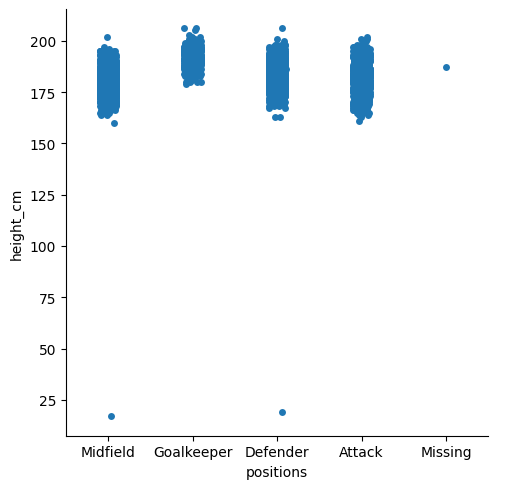

In [40]:
sns.catplot(data = df, x = "positions", y = "height_cm")

Our first graph! This is called a *swarm* plot; it’s like a scatter plot
for categorical variables.

It’s already revealed two things to us about the data:

-   There are some incorrect heights - nobody is shorter than 25cm!
-   Someone’s position is “missing”

Let’s get rid of these with the data analysis techniques from last
session

In [41]:
# Remove missing position
df = df[df["positions"] != "Missing"]

# Ensure reasonable heights
df = df[df["height_cm"] > 100]

Run the plot again, it’s more reasonable now

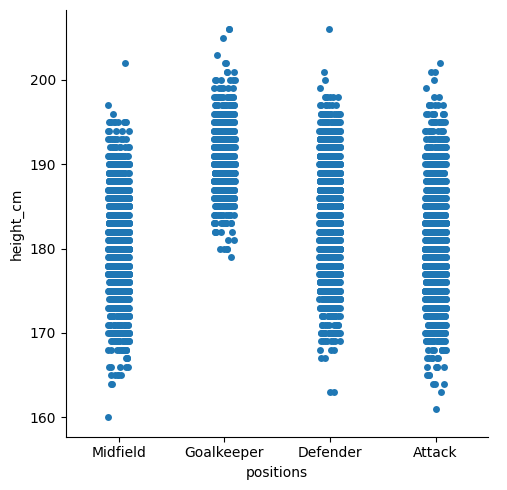

In [42]:
sns.catplot(data = df, x = "positions", y = "height_cm")

#### Bar plots

Swarm plots are interesting but not standard. You can change the plot
type with the `kind` parameter

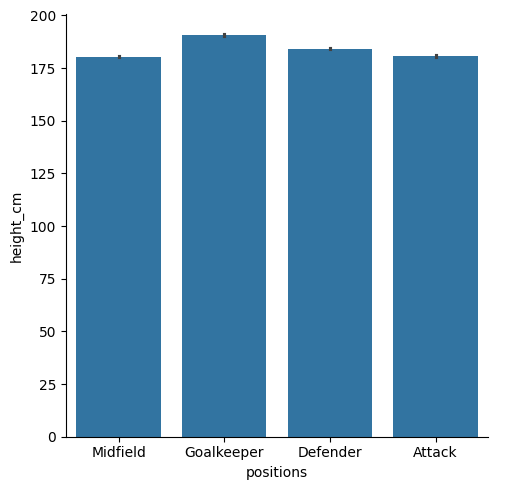

In [43]:
sns.catplot(data = df, x = "positions", y = "height_cm", kind = "bar")

> Many aspects of your plot can be adjusted by sending in additional
> parameters and is where seaborn excels.

It seems like goalkeepers are taller, but not by much. Let’s look at the
standard deviation for each position by changing the `estimator =`
parameter (default is mean)

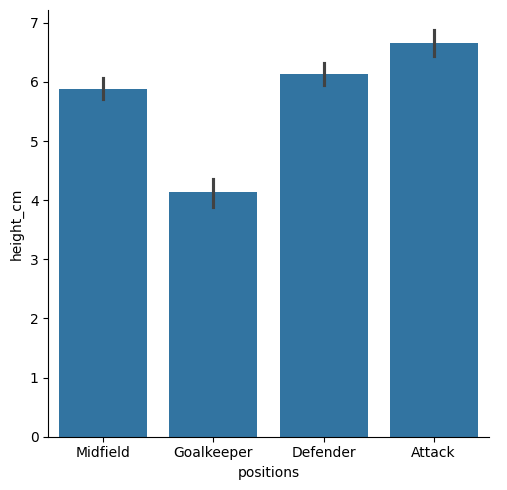

In [44]:
sns.catplot(data = df, x = "positions", y = "height_cm", kind = "bar", estimator = "std")

Clearly there’s a lot less variation in goalkeepers - they’re all tall.

#### Detour - line length

Notice that our last line was longer than 79 characters? That’s bad
Python, and hard to read. We can fix this by making it a multi-line
function, placing arguments on new lines, according to [PEP
8](https://peps.python.org/pep-0008/#code-lay-out)

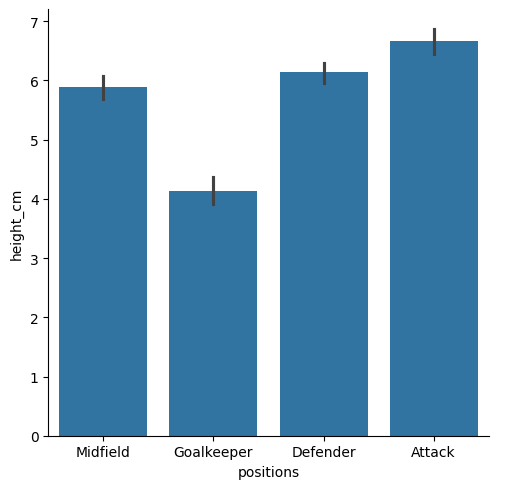

In [45]:
sns.catplot(data = df, x = "positions", y = "height_cm", kind = "bar", 
            estimator = "std")

#### Box plots

Let’s make box plots instead. It’s the same procedure, just change to
`kind = "box"` and remove `estimator =`

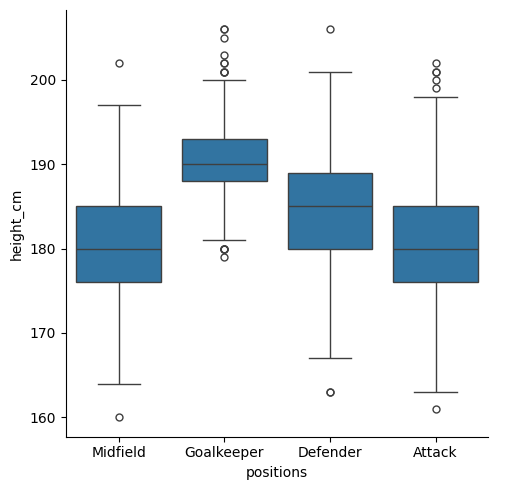

In [46]:
sns.catplot(data = df, x = "positions", y = "height_cm", kind = "box")

Just as we predicted.

### Distributions

#### Histograms

Let’s move to the “Age” parameter now. We can look at the distribution
of ages with

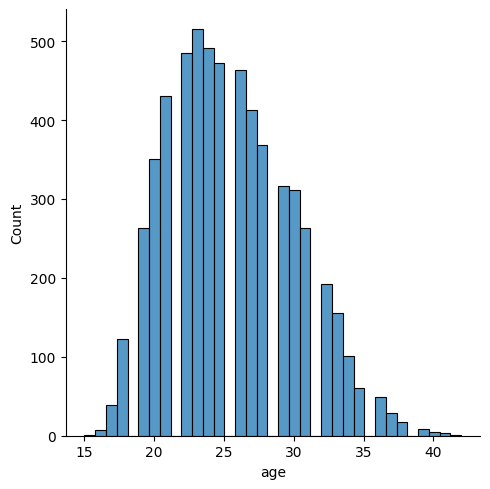

In [47]:
sns.displot(data = df, x = "age")

Looks a bit funny with those gaps - let’s change the number of bins with
`bins = 28`

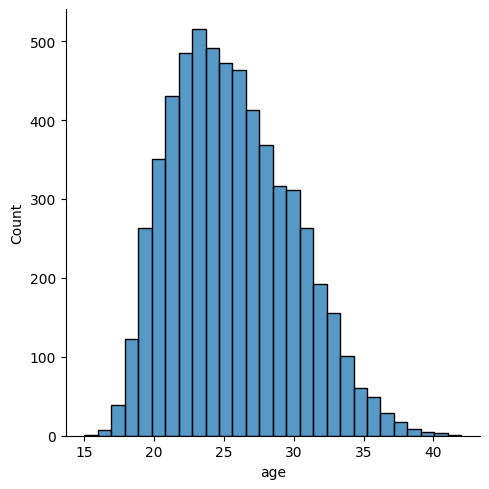

In [48]:
sns.displot(data = df, x = "age", bins = 28)

Now, what if you wanted to look at the distribution for different
variables? We can make a separate distribution for each position with
the `row = "positions"` argument, specifying a new row for each position

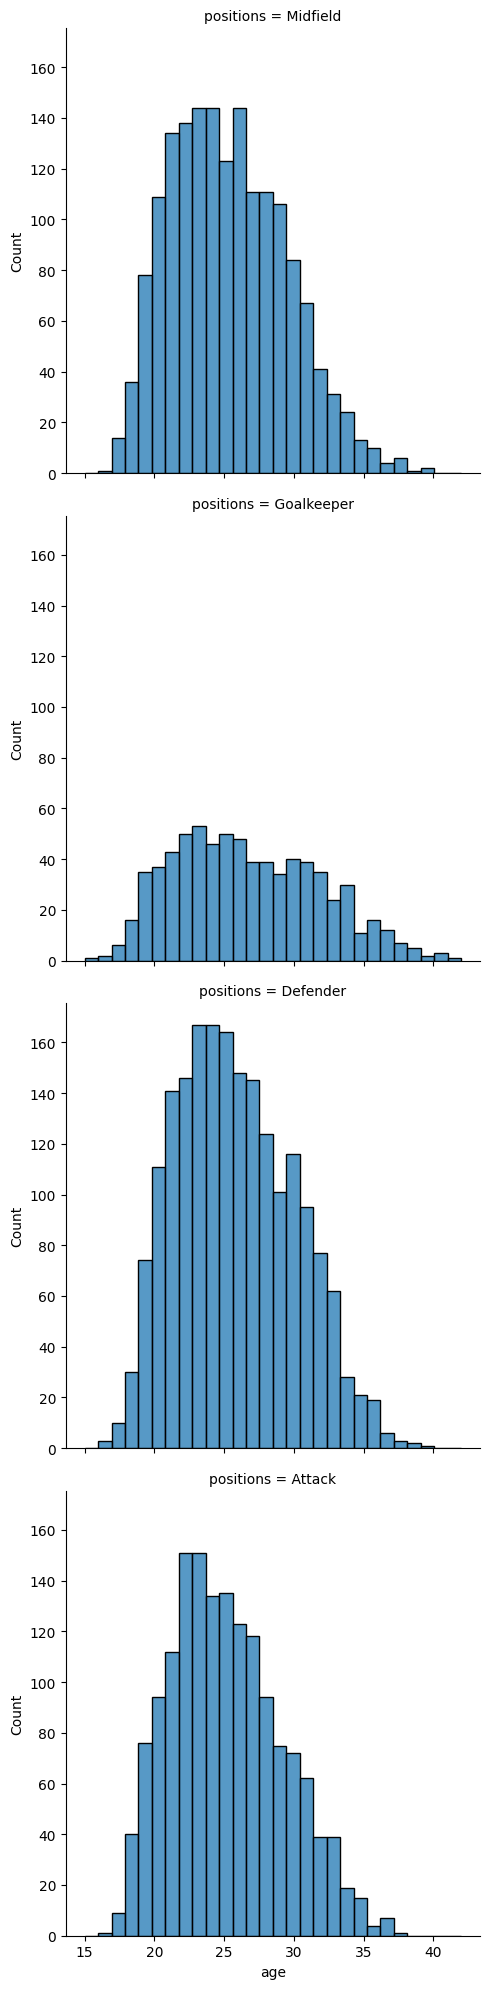

In [49]:
sns.displot(data = df, x = "age", bins = 28, row = "positions")

#### Kernel density estimates

Finally, you don’t *have* to do histograms. You could also do a Kernel
Density Estimate, with `kind = "kde"` (let’s remove `bins =` and
`row =`)

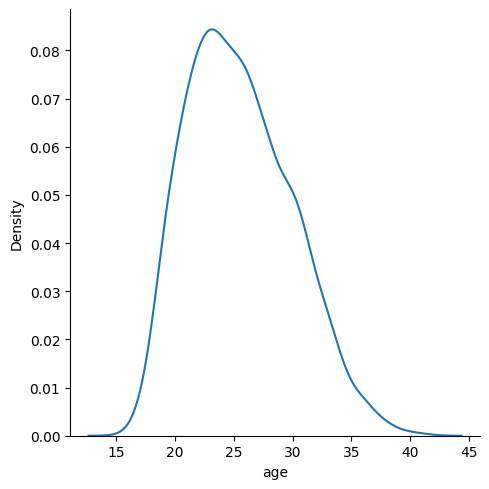

In [50]:
sns.displot(data = df, x = "age", kind = "kde")

If you want a separate line for each position, we should indicate that
each position needs a different colour/hue with `hue = "positions"`

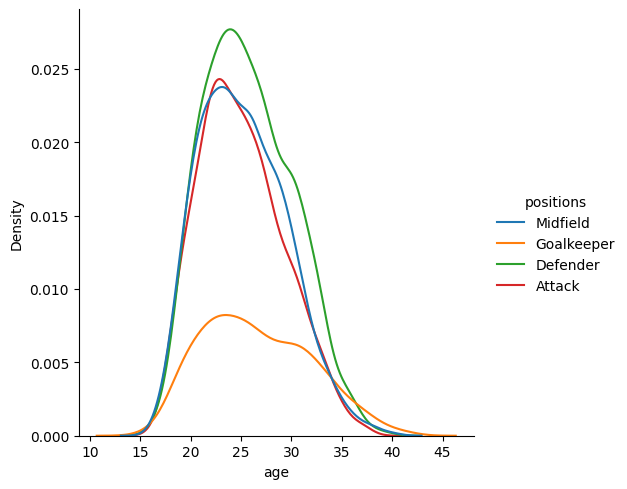

In [51]:
sns.displot(data = df, x = "age", hue = "positions", kind = "kde")

### Activity 1

Create a histogram which looks at the distribution of heights, with a
separate distribution for each position, distinguished by colour. Then,
use the `multiple = "stack"` parameter to make it a bit neater.

:::{.callout-note collapse="true"}
# Solution

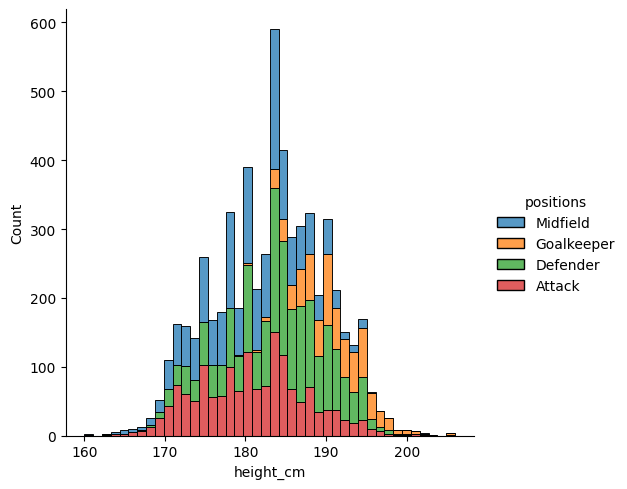

In [52]:
sns.displot(data = df, x = "height_cm", hue = "positions", multiple = "stack")

:::

### Relational plots

It seems like players peak in their mid-twenties, but goalkeepers stay
for longer. Let’s see if there’s a relationship between players’ **age**
and **height**

#### Scatter plots

We’ll start with a scatter plot

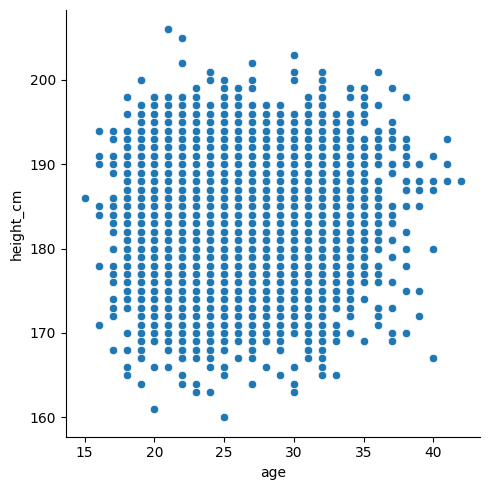

In [53]:
sns.relplot(data = df, x = "age", y = "height_cm")

Not much of a trend there, although the bottom-right looks a bit emptier
than the rest (could it be that short old players are the first to
retire?).

We can use `hue =` to have a look at positions again

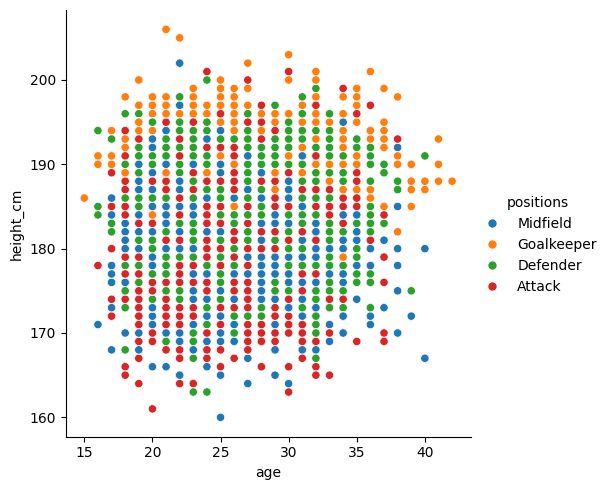

In [54]:
sns.relplot(data = df, x = "age", y = "height_cm", hue = "positions")

Yup, goalkeepers are tall, and everyone else is a jumble.

#### Line plots

Let’s do a line plot of the average height per age.

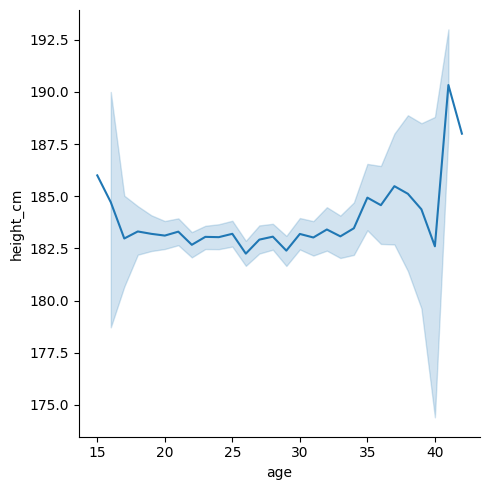

In [55]:
sns.relplot(data = df, x = "age", y = "height_cm", kind = "line")

Seems pretty flat, except the ends are a bit weird because there’s not
much data. Let’s eliminate everything before 17 and after 38 and plot it

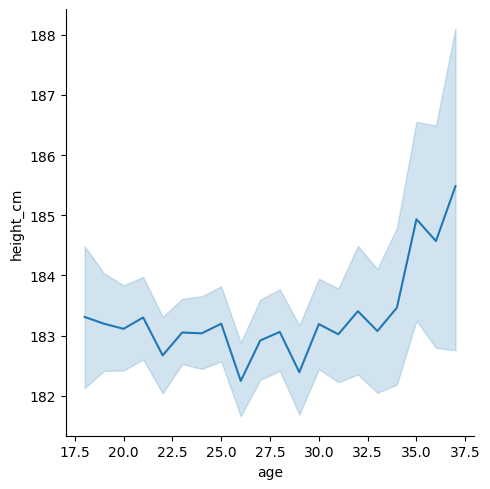

In [56]:
# Create smaller dataframe
condition = (df["age"] > 17) & (df["age"] < 38)
inner_ages = df[condition]

# Line plot
sns.relplot(data = inner_ages, x = "age", y = "height_cm", kind = "line")

Looks a bit shaky but that’s just because it’s zoomed in - notice that
we go from 182cm to 184cm. We’ll fix this when we look at matplotlib in
the next section.

#### Combining the two

We can combine our scatter and line plots together.

1.  Make the first plot as normal
2.  For all additional (overlaying) plots, use an **axes-level plot**
    instead of `sns.relplot()` etc. These just draw the
    points/bars/lines, and are normally behind-the-scenes. There’s one
    for every plot type, and look like
    -   `sns.lineplot()`
    -   `sns.scatterplot()`
    -   `sns.boxplot()`
    -   `sns.histplot()`
    -   etc.

For example,

<Axes: xlabel='age', ylabel='height_cm'>

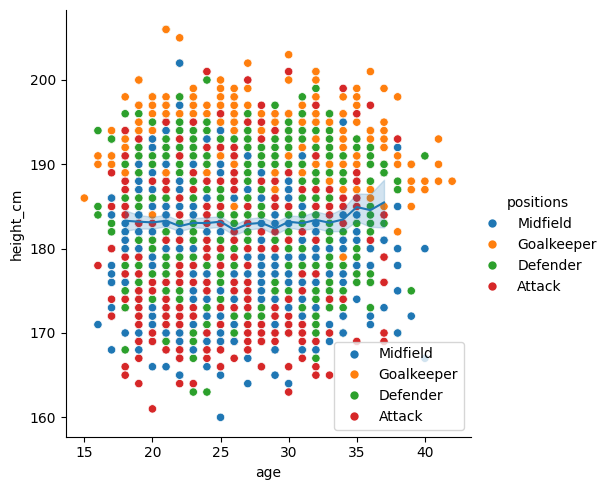

In [57]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", hue = "positions")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm")

> **You can’t include `kind =` inside an axes level plot**

Let’s swap the colour variable from the scatter plot to the line plot

<Axes: xlabel='age', ylabel='height_cm'>

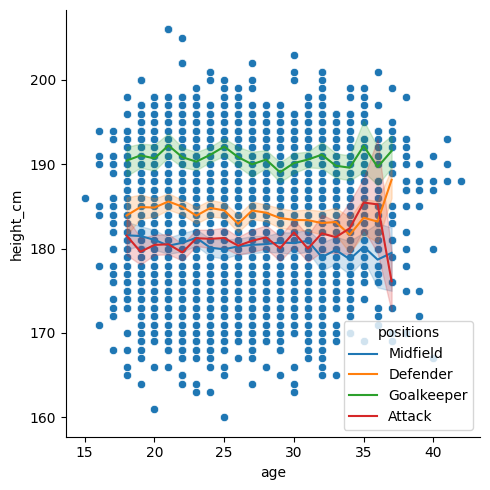

In [58]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

Finally, let’s make the scatter dots smaller with `s = 10` and grey with
`color = "grey"`.

<Axes: xlabel='age', ylabel='height_cm'>

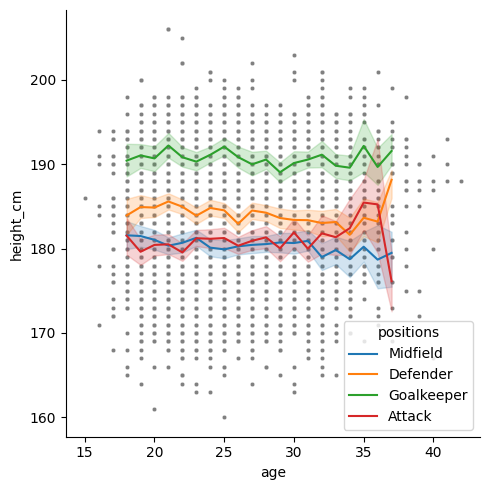

In [59]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

### Activity 2

It’s really important to become familiar with the documentation. Go to
the [`sns.relplot`
documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html),
and look up the following parameters:

-   `col`
-   `col_wrap`
-   `col_order`
-   `hue_order`
-   `legend`

Using those parameters, create a scatter plot for age vs height (like
above), which meets the following conditions:

- Separate the plots for each position.
- Apply a different colour to each position. 
- Arrange the plots in **two** columns
- Remove the legend
- Manually order the colours:
    1.  Attack
    2.  Midfield
    3.  Defender
    4.  Goalkeeper

:::{.callout-tip}
# Hint
For the ordering, you might want to make a list with the desired order, e.g. `order = ["Attack", "Midfield", ... ]`
:::

:::{.callout-note collapse="true"}
# Solution

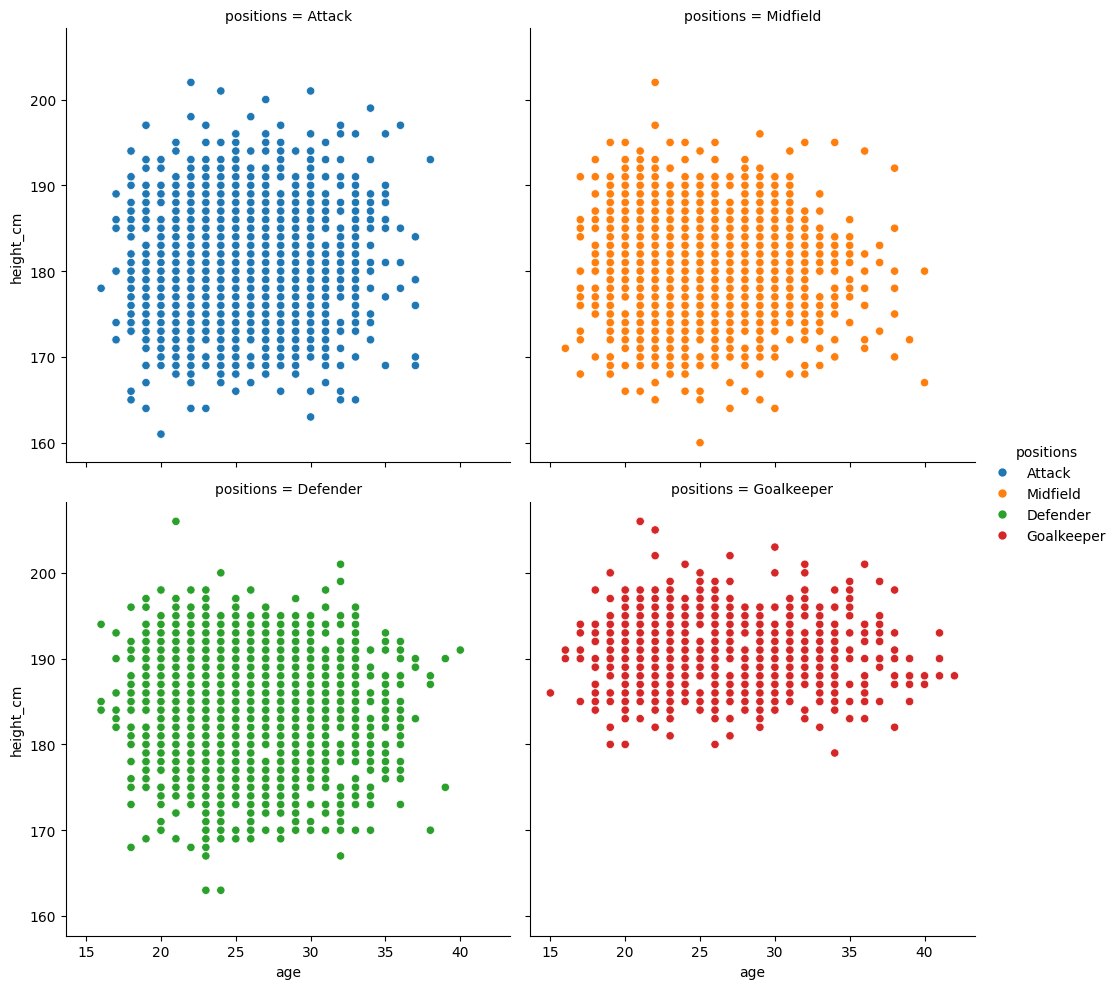

In [60]:
order = ["Attack", "Midfield", "Defender", "Goalkeeper"]

sns.relplot(data = df, x = "age", y = "height_cm", hue = "positions", 
            col = "positions", col_wrap = 2, hue_order = order, 
            col_order = order)

:::

## Going deeper with `matplotlib`

Seaborn is great for simple and initial visualisations, but when you
need to make adjustments it gets tricky. At its core, seaborn is just a
simple way of using [matplotlib](https://matplotlib.org/), an extensive
and popular plotting package. It was created as a way of doing MATLAB
visualisations with Python, so if you’re coming from there, things will
feel familiar.

**Pros**

-   Customisable. You can tweak almost every parameter of the
    visualisations
-   Fast. It can handle large data
-   Popular. Lots of people use it, and knowing it will help you
    collaborate

**Cons** - a bit programmy

-   Steep-ish learning curve. Creating basic plots can be easy, but its
    set up with enough complexity that it takes a bit of work to figure
    out what’s going on.
-   Cumbersome. You can tweak almost everything, but this means that it
    can take some effort to tweak *anything*.

We’re barely going to touch the matplotlib surface, but we’ll look at
some essentials.

### Saving plots

Before we move to adjusting the plot, let’s just look at how you save
it. While you *can* do this with seaborn, the matplotlib way is also
very simple.

As a first step, you should make a new folder. Navigate using your file
explorer to the project and create a new folder called “plots”.

Next, save the current plot with `plt.savefig("place_location_here")`,
and **we have to do this at the same time that we make the plot**. Let’s
save our previous overlaying plot:So run all this code at once:

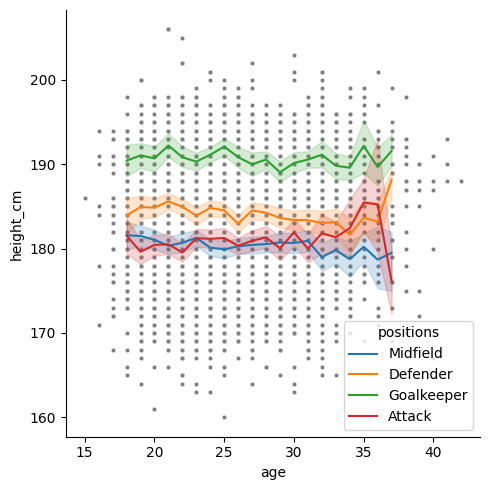

In [61]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

plt.savefig("plots/first_saved_plot.png")

### Making modifications

#### Titles

Notice that the $y$ axis has an ugly label? That’s because seaborn is
just drawing from your dataframe.

We can change axis labels with `plt.ylabel()`

Text(4.944444444444445, 0.5, 'Height (cm)')

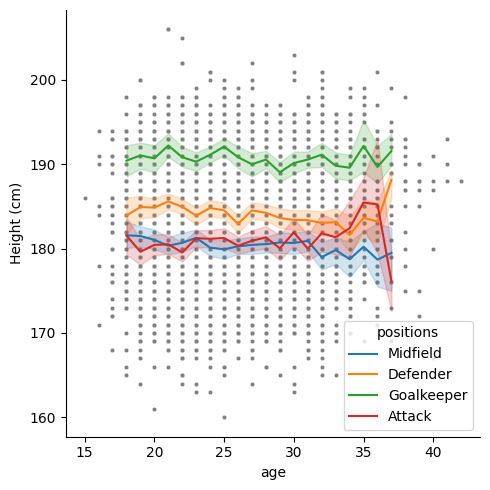

In [62]:
# Plotting functions
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Customisation
plt.ylabel("Height (cm)")

and similarly you could change `plt.xlabel(...)`.

> Make sure you run the above line **at the same time** as your plotting
> function. You can either \* Highlight **all** the code and press
> <kbd>F9</kbd> \* Make a cell with `#%%` and press <kbd>ctrl</kbd> +
> <kbd>enter</kbd>

We can also change the legend title to “positions” with `plt.legend()`

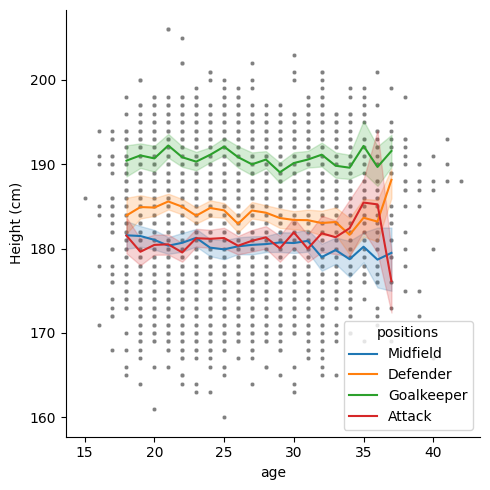

In [ ]:
# Plotting functions
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Customisation
plt.ylabel("Height (cm)")
plt.legend(title = "Positions")

And its location with `loc = "lower left"`

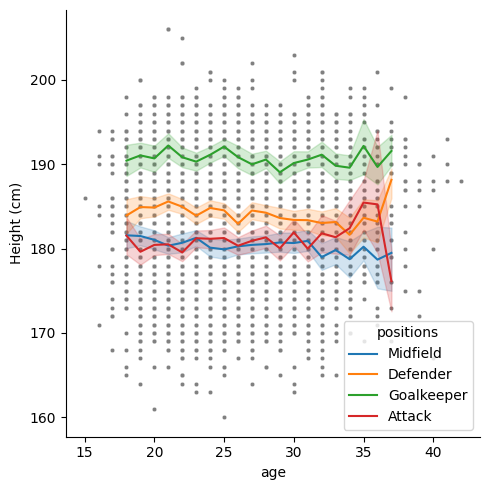

In [ ]:
# Plotting functions
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Customisation
plt.ylabel("Height (cm)")
plt.legend(title = "Positions")

And give the whole plot a title with `plt.title()`

Text(0.5, 1.0, "Players' heights vs ages")

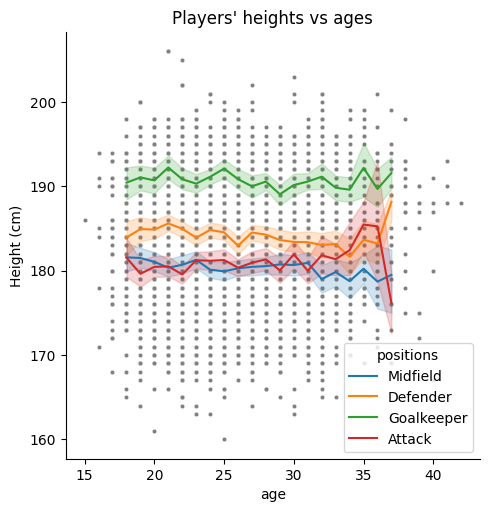

In [ ]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Titles
plt.ylabel("Height (cm)")
plt.legend(title = "Positions")
plt.title("Are players' heights and ages related?")

### Annotations

You might want to annotate your plot with text and arrows. Text is
simple with the `plt.text()` function; we just need to specify its
coordinates and the contents.

Text(38.5, 181, 'Not enough\ndata for mean')

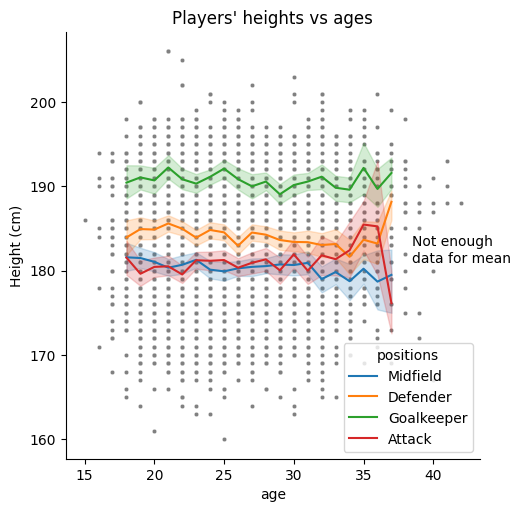

In [ ]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Titles
plt.ylabel("Height (cm)")
plt.legend(title = "Positions")
plt.title("Are players' heights and ages related?")

# Annotations
plt.text(38.5, 181, "Not enough\ndata for mean")

> The characters `\n` mean ‘new line’

We could annotate with arrows too. This is more complex, using the
`plt.annotate()` function:

Text(40, 172, 'No short\nolder players')

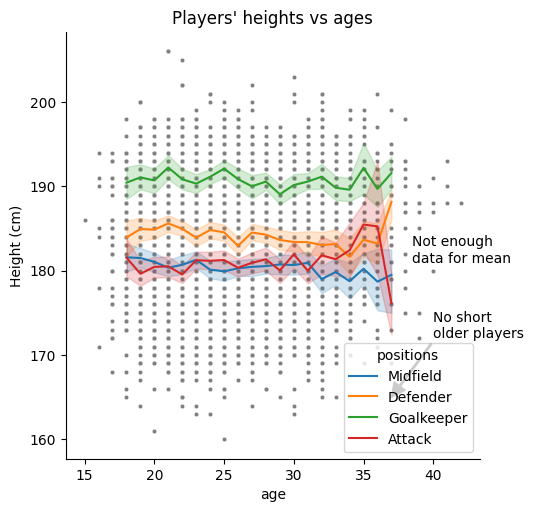

In [ ]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Titles
plt.ylabel("Height (cm)")
plt.legend(title = "Positions")
plt.title("Are players' heights and ages related?")

# Annotations
plt.text(38.5, 181, "Not enough\ndata for mean")
plt.annotate(text = "No short\nolder players", xy = [37,165], xytext = [40,172],
             arrowprops = dict(width = 1, headwidth = 10, headlength = 10, 
                          facecolor = "black"))

> I’ve split this over multiple lines, but its still **one function** -
> check the brackets

All together, our plot has become

### Axis limits

The last feature we’ll look at is editing axis limits. Let’s try to make
more room in the bottom left for the legend with the functions
`plt.xlim()` and `plt.ylim()`

(150.0, 210.0)

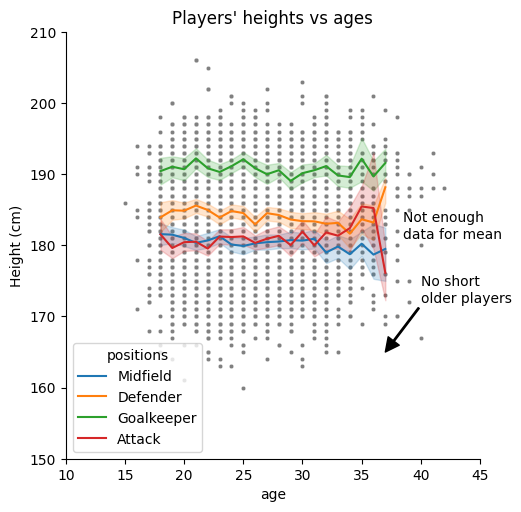

In [ ]:
# Figure level plot
sns.relplot(data = df, x = "age", y = "height_cm", s = 10, color = "grey")

# Axes level plot (drop the kind = )
sns.lineplot(data = inner_ages, x = "age", y = "height_cm", hue = "positions")

# Titles
plt.ylabel("Height (cm)")
plt.legend(title = "Positions", loc = "lower left")
plt.title("Are players' heights and ages related?")

# Annotations
plt.text(38.5, 181, "Not enough\ndata for mean")
plt.annotate("No short\nolder players", [37,165], [40,172], 
             arrowprops = dict(width = 1,headwidth = 10,headlength = 10, 
                               facecolor = "black"))

# Axis limits
plt.xlim([10,45])
plt.ylim([150,210])

I’m not sure that looks any better, but you get the idea!

## Conclusion

As we have seen, seaborn and matplotlib are a powerful tools for
visualising data efficiently and aesthetically. A range of other plot
types and customisation is available, for inspiration have a look at the
[seaborn gallery](https://seaborn.pydata.org/examples/index.html) and
[matplotlib gallery](https://matplotlib.org/stable/gallery/). If any of
the content here was too challenging, you have other related issues
you’d like to discuss or would simply like to learn more, we the
technology training team would love to hear from you. You can contact us
at <training@library.uq.edu.au>.

Here’s a summary of what we’ve covered

| Topic | Description |
|------------------------------------|------------------------------------|
| **Plotting** | Using `seaborn`’s `sns.catplot()` (categorical), `sns.relplot()` (relational, i.e. scatter & line) and `sns.displot()` (distributive) functions, we can make plots by specifying various parameters, e.g. `x = ...`, `y = ...`, `hue = ...`, etc. |
| **Introducing variables into visualisations** | We don’t just have to use $x$- and $y$-axes: we can use colour (`hue = ...`), shape (`style = ...`), size (`size = ...`) and facets (`col = ...`, `row = ...`) to introduce more variables to our visualisations. |
| **Overlaying plots** | By combining a figure-level plot (e.g. `sns.catplot()`) with multiple axes-level plots (e.g. `sns.boxplot()`), we can overlay multiple graphs onto the same visualisation |
| **Saving figures** | We can use `matplotlib`’s function `plt.savefig(...)` to export our plots |
| **Customisations** | The functions `plt.xlabel()`, `plt.ylabel()` and `plt.title()` allow you to customise your plot’s axes. The `plt.legend()` function modifies the legend, and `plt.xlim()` and `plt.ylim()` adjust the axis limits. |
| **Annotations** | Use the functions `plt.text()` and `plt.annotate()` to draw lines and text on your visualisation. |

Below is a summary of *all* available\* plots in seaborn. Most of these
have been examined in either the introductory session or this one,
however, there are some which we have not yet looked at. The [seaborn
documentation](https://seaborn.pydata.org/api.html) and
[tutorials](https://seaborn.pydata.org/tutorial.html) provide
desciptions and advice for all available plots.

> \*As of v0.12.2

### Figure- to Axes-level plot

All the plots below are figure-level. To produce the axes-level plot of
the same type, simply use

```python
sns.****plot()
```

where `****` is given in `kind = "****"` for the corresponding
figure-level plot. For example,


```python
sns.relplot( ..., kind = "scatter", ... ) # Figure-level scatter plot
sns.scatterplot( ... ) # Axes-level scatter plot
```

### Relational Plots

| Plot Name | Code | Notes |
| --- | --- | --- |
| Scatter Plot          | `sns.relplot( ... , kind = "scatter", ... )` | Requires numerical data |
| Line Plot             | `sns.relplot( ... , kind = "line", ... )` | Requires numerical data | 

### Distributions

| Plot Name | Code | Notes |
| --- | --- | --- |
| Histogram             | `sns.displot( ... , kind = "hist", ... )` | Can be univariate (`x` only) or bivariate (`x` and `y`)|
| Kernel Density Estimate| `sns.displot( ... , kind = "kde" , ... )` | Can be univariate (`x` only) or bivariate (`x` and `y`)|
| ECDF* | `sns.displot( ... , kind = "ecdf", ... )` | . |
| Rug Plot              | `sns.displot( ... , rug = True , ... ) `  | Combine with another `sns.displot`, plots marginal distributions | 

> *Empirical Cumulative Distribution Functions

### Categorical Plots

| Plot Name | Code | Notes |
| --- | --- | --- |
| Strip Plot            | `sns.catplot( ... , kind = "strip" , ... )`| Like a scatterplot for categorical data |
| Swarm Plot            | `sns.catplot( ... , kind = "swarm" , ... )`| . |
| Box Plot              | `sns.catplot( ... , kind = "box" , ... )` | One variable is always interpreted categorically |
| Violin Plot           | `sns.catplot( ... , kind = "violin" , ... )` | One variable is always interpreted categorically |
| Enhanced Box Plot     | `sns.catplot( ... , kind = "boxen", ... )`  | A box plot with additional quantiles |
| Point Plot            | `sns.catplot( ... , kind = "point" , ... ) ` | Like a line plot for categorical data | 
| Bar Plot              | `sns.catplot( ... , kind = "bar" , ... ) `    | Aggregates data | 
| Count Plot            | `sns.catplot( ... , kind = "count" , ... )` | A bar plot with the total number of observations |


### Other Plots
| Plot Name | Code | Notes |
| --- | --- | --- |
| Pair Plot             | `sns.pairplot( ... )` | A form of facetting |
| Joint Plot            | `sns.jointplot( ... )` | . |
| Regressions           | `sns.lmplot( ... )` | . |
| Residual Plot         | `sns.residplot( ... )` | The residuals of a linear regression |
| Heatmap               | `sns.heatmap( ... )`  | . |
| Clustermap            | `sns.clustermap( ... )` | . |


## Resources

- [Official seaborn documentation](https://seaborn.pydata.org/index.html)
- [Official matplotlib documentation](https://matplotlib.org/stable/index.html)
- Our [compilation of useful Python links](https://github.com/uqlibrary/technology-training/blob/master/Python/useful_links.md)